# Predicting Heart Disease in the Hungarian Dataset: The Role of Age, Cholesterol, and Maximum Heart Rate

### Introduction

Cardiovascular diseases are the leading cause of death globally, underscoring the critical need for enhanced preventative strategies (Di Cesare et al., 2024). This study employs predictive modelling to assess whether age, cholesterol, and maximum heart rate are effective predictors of heart disease within the Hungarian subset of the UCI Heart Disease dataset. Central to our analysis is the question: **"Do age, cholesterol levels, and maximum heart rate effectively predict heart disease?"** Answering this could significantly improve the detection and management of heart disease.

### Background

Heart disease, particularly coronary artery disease, involves narrowed arteries that restrict blood flow to the heart, largely due to high cholesterol leading to arterial blockages and possibly heart attacks (Rodgers et al., 2019). Additionally, a reduced maximum heart rate can signal poor heart health, often associated with heart disease (Harvard Health, 2023). This project employs the Hungarian dataset and a k-nearest neighbours (k-NN) classification to assess the predictive value of cholesterol levels and heart rate on heart disease, aiming to improve diagnostic accuracy and healthcare outcomes.

### Methods

#### Preprocessing and Data Analysis

We employed the UCI Heart Disease Hungarian dataset, containing patient demographic and physiological data. Initial steps involved cleaning the data, converting relevant features into numeric formats, and dealing with missing values. The data was divided into training and testing sets, with the former used for model development and the latter reserved for evaluation.

#### Model Optimization

Our approach focused on refining a k-nearest neighbours (KNN) classifier:

- **Data Standardization**: We normalized predictor scales through centering and scaling to enhance model performance.
- **Cross-Validation**: Utilized ten-fold cross-validation on the training set to ensure model stability and robustness.
- **Hyper-parameter Tuning**: Tuned the `k` value in KNN to find the optimal number for best accuracy.
- **Workflow Integration**: Integrated preprocessing and model configuration in a workflow using `tune_grid` for systematic hyper-parameter testing.
- **Baseline Comparison**: Verified model performance against a simple majority classifier to ensure meaningful predictions.

#### Visualization and Evaluation

We visualized the model's accuracy for various `k` values and used a confusion matrix for detailed performance analysis, aiding in the selection of the best `k`.

#### Final Testing

After identifying the best `k`, we finalized the model and applied it to the test data:

- **Model Finalization**: Confirmed the optimal `k` from validation results and finalized the model.
- **Prediction on Test Data**: Predictions on the testing set evaluated the classifier’s effectiveness in real-world conditions, focusing on accuracy, precision, and recall.

### Importing Libraries and Data Formatting

In [1]:
# Loading necessary libraries for data manipulation, visualization, and modeling
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
library(cowplot)

options(repr.matrix.max.rows = 6) # Limiting the maximum number of rows displayed to enhance readability
options(repr.plot.width = 10, repr.plot.height = 6) # Graph formatting

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Preprocessing and Exploratory Data Analysis

### Reading The Data

In [2]:
# Load the Hungarian heart disease dataset
hungarian_data <- read_csv("data/heart_disease/processed.hungarian.data")
hungarian_data

New names:
• `2` -> `2...3`
• `0` -> `0...6`
• `2` -> `2...7`
• `0` -> `0...9`
• `0` -> `0...10`
• `?` -> `?...11`
• `?` -> `?...12`
• `?` -> `?...13`
• `0` -> `0...14`
Rows: 293 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): 130, 132, 0...6, 2...7, 185, 0...9, ?...11, ?...12, ?...13
dbl (5): 28, 1, 2...3, 0...10, 0...14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


28,1,2...3,130,132,0...6,2...7,185,0...9,0...10,?...11,?...12,?...13,0...14
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


*Figure 1: Initial Dataset*

The initial dataset contains several issues typical of real-world data, including missing values represented as "?" and incorrect data types for certain columns due to these missing entries. The columns contain data values instead of descriptive names.

## Data Cleaning and Wrangling

**Data Cleaning Overview:**

1. **Column Labeling:** We began by assigning meaningful and descriptive names to each column as per the dataset documentation, which clarified the context and significance of the data.

2. **Missing Values:** To facilitate data type conversion and ensure robust analysis, we replaced "?" symbols with `NA` values, standardizing the missing data representation.

3. **Excluding Incomplete Data:** Rows with any `NA` values were removed to guarantee that only complete datasets were used in the analysis, enhancing the reliability of our findings.

4. **Type Conversion:** After resolving missing values, we converted columns to their appropriate numeric data types, enabling precise statistical analysis and modelling.

In [12]:
# Set column names, convert data types, and handle missing values for the Hungarian heart disease dataset

hungarian_data[ hungarian_data == "?" ] <- NA

colnames(hungarian_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", 
                              "ca", "thal", "num")

hungarian_data <- hungarian_data |>
                    mutate(
                    age = as.numeric(age),
                    chol = as.numeric(chol),
                    thalach = as.numeric(thalach),
                    num = as.factor(num),  # Convert target variable for classification
                    thalach = replace(thalach, is.na(thalach), mean(thalach, na.rm = TRUE))
                    )

cleaned_data <- hungarian_data |>
                filter(!is.na(age) & !is.na(chol) & !is.na(thalach))

cleaned_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


*Figure 2: Cleaned Dataset*

The dataset is in clean and tidy format, aiding us to further interpret the data without any misinterpretations.

## Splitting Data into Training and Testing Sets

To prepare for modelling, we'll divide our data into training and testing sets, stratifying by the '`num`' column to ensure balanced representation of each class.

In [13]:
set.seed(123)  # Setting a seed to make the split reproducible
split <- initial_split(cleaned_data, prop = 0.75, strata = num) # Split 75% for training, 25% for testing, stratified by heart disease presence
training_data <- training(split)
testing_data <- testing(split)

training_data
cat("Figure 3: Training Data\n")

testing_data
cat("Figure 4: Testing Data\n")

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


Figure 3: Training Data


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,1,2,136,164,0,1,99,1,2,2,NA,NA,1
41,1,4,120,336,0,0,118,1,3,2,NA,NA,1
52,1,4,140,266,0,0,134,1,2,2,NA,NA,1


Figure 4: Testing Data


## Summarizing the Training Data

Before the detailed analysis, we summarize the training data to understand its characteristics. This includes generating key statistics like average age, cholesterol levels, maximum heart rate, prevalence of heart disease, and missing data points. This step helps assess data quality and prepares us for deeper analysis.

In [14]:
# Generate a summary table for the training data with key statistics

summary_table <- training_data |>
                  summarize(
                    Total_Observations = n(),
                    Mean_Age = mean(age, na.rm = TRUE),
                    Mean_Cholesterol = mean(chol, na.rm = TRUE),
                    Mean_Max_Heart_Rate = mean(thalach, na.rm = TRUE),
                    Heart_Disease_Presence = sum(num == "1", na.rm = TRUE),
                    Missing_Data = sum(is.na(age) + is.na(chol) + is.na(thalach))
                  )
summary_table

Total_Observations,Mean_Age,Mean_Cholesterol,Mean_Max_Heart_Rate,Heart_Disease_Presence,Missing_Data
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
201,48.28856,253.4129,139.1891,75,0


*Figure 5: Summary of Training Data*

This table summarizes key statistics from the training dataset, featuring 201 observations. It shows average values for age (20.28 years), cholesterol (253.41 mg/dL), and maximum heart rate (139.19 bpm), with 75 instances of heart disease presence and no missing data.

## Visualizing the Training Data

Next, we will visualize the relationships between age, cholesterol, and maximum heart rate with the presence of heart disease. These visualizations will help identify patterns and insights that could influence our model's development.

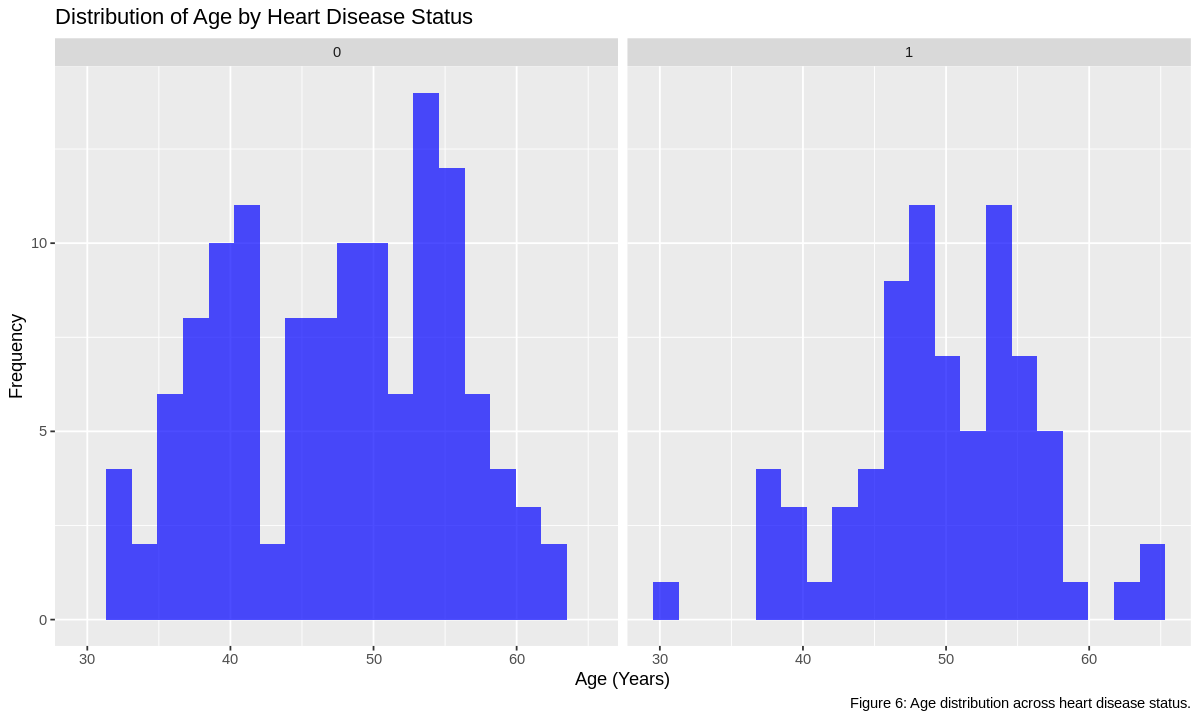

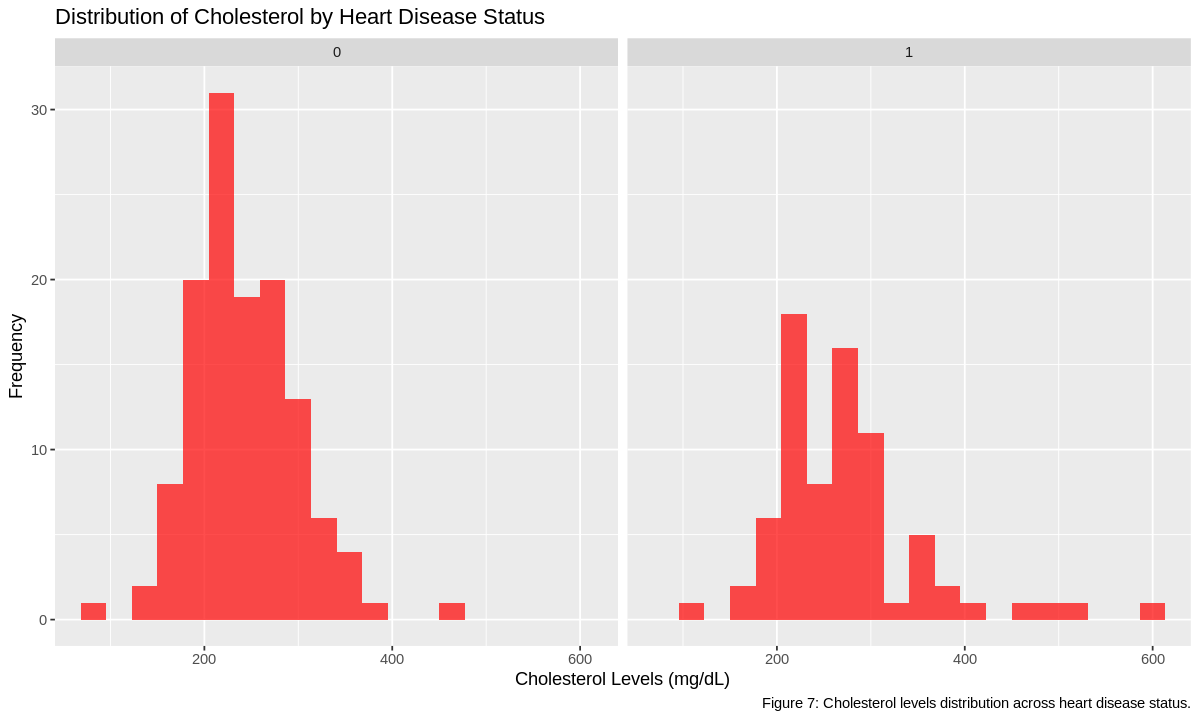

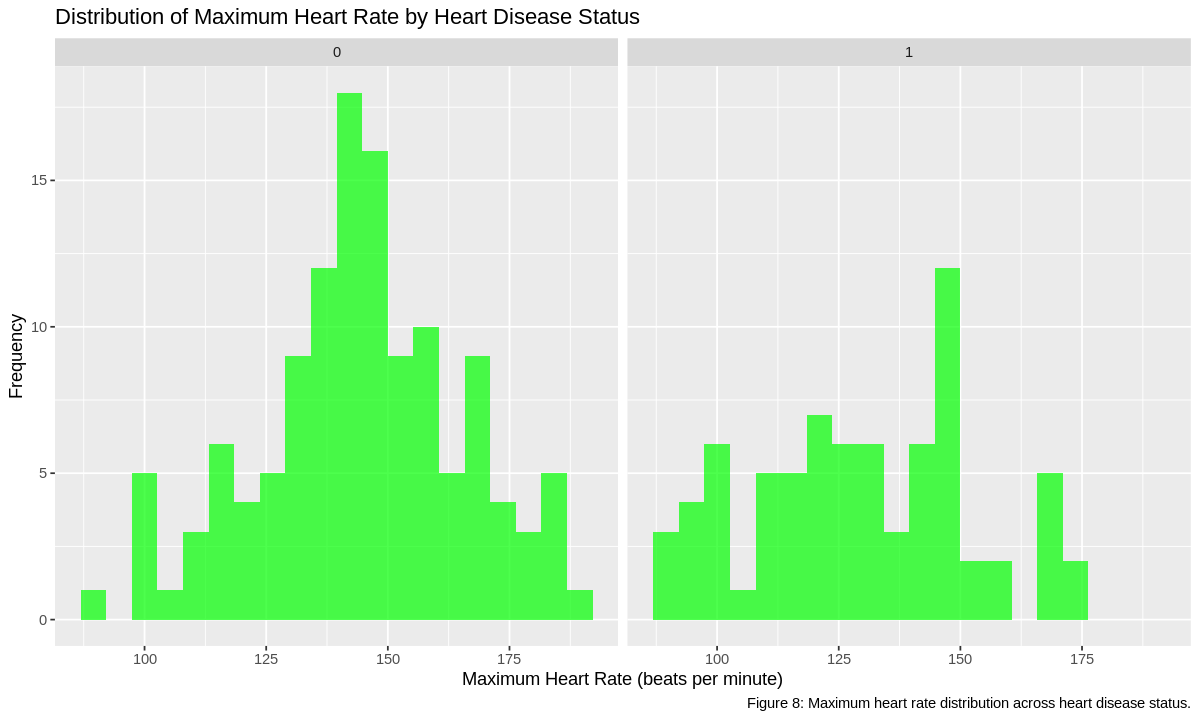

In [15]:
# Histogram for Age Distribution by Heart Disease Status
ggplot(training_data, aes(x = age)) +
  geom_histogram(bins = 20, fill = "blue", alpha = 0.7) +
  facet_wrap(~num) +
  labs(title = "Distribution of Age by Heart Disease Status",
       x = "Age (Years)",
       y = "Frequency",
       caption = "Figure 6: Age distribution across heart disease status.")

# Histogram for Cholesterol Distribution by Heart Disease Status
ggplot(training_data, aes(x = chol)) +
  geom_histogram(bins = 20, fill = "red", alpha = 0.7) +
  facet_wrap(~num) +
  labs(title = "Distribution of Cholesterol by Heart Disease Status",
       x = "Cholesterol Levels (mg/dL)",
       y = "Frequency",
       caption = "Figure 7: Cholesterol levels distribution across heart disease status.")

# Histogram for Maximum Heart Rate Distribution by Heart Disease Status
ggplot(training_data, aes(x = thalach)) +
  geom_histogram(bins = 20, fill = "green", alpha = 0.7) +
  facet_wrap(~num) +
  labs(title = "Distribution of Maximum Heart Rate by Heart Disease Status",
       x = "Maximum Heart Rate (beats per minute)",
       y = "Frequency",
       caption = "Figure 8: Maximum heart rate distribution across heart disease status.")

### Data Distributions by Heart Disease Status

- Metrics: `0` indicates no heart disease, `1` indicates its presence.

### Age
*Figure 6:* Individuals without heart disease typically cluster around their mid-50s. Those with heart disease also peak in their mid-50s but extend into the late 50s and early 60s, suggesting increased risk with advancing age.

### Cholesterol
*Figure 7:* Most participants have cholesterol levels in the 200-300 mg/dL range, associated with higher risk. People with heart disease display a broader spread, implying a link between higher cholesterol and heart disease.

### Maximum Heart Rate
*Figure 8:* Healthier individuals often reach 150-170 bpm, indicating better cardiac health. In contrast, those with heart disease show peaks at 125-145 bpm, reflecting compromised cardiac function.

## Optimizing K-Value for Heart Disease Prediction

We refined our K-nearest neighbours model to predict heart disease with several key steps:

1. **Recipe Creation**: Developed a recipe using training data with age, cholesterol, and maximum heart rate as predictors for heart disease.
  
2. **Model Specification**: Set up a KNN model with a tuneable number of neighbours and a rectangular weight function to focus purely on the nearest points.

3. **Cross-Validation Setup**: Partitioned the training data into 10 stratified folds to ensure balanced representation of outcomes in each fold.

4. **Workflow and Tuning**: Combined the recipe and model into a workflow, applying `tune_grid` to test neighbour values from 1 to 100 to find the optimal setting for best accuracy.

5. **Seed for Reproducibility**: Fixed the seed at 123 to ensure consistent results across runs, enhancing the reliability of our model tuning.

In [16]:
set.seed(123)
# Create the recipe
knn_recipe <- recipe(num ~ age + chol + thalach, data = training_data) |>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())

# Define the KNN model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
              set_engine("kknn") |>
              set_mode("classification")

# Set up cross-validation
cv_folds <- vfold_cv(training_data, v = 10, strata = num)

gridvals <- tibble(neighbors = seq(from = 1, to = 100))

# Tune the KNN model
knn_results <- workflow() |>
              add_recipe(knn_recipe) |>
              add_model(knn_spec) |>
              tune_grid(resamples = cv_folds, grid = gridvals) |>
              collect_metrics() |>
              filter(.metric == "accuracy") |>
              select(neighbors, mean) |>
              arrange(desc(mean))

head(knn_results)

neighbors,mean
<int>,<dbl>
13,0.7186591
14,0.7186591
25,0.7003509
26,0.7003509
51,0.6998496
52,0.6998496


*Figure 9: Optimal k-values for K-Nearest Neighbours Model*

The table shows that the optimal number of neighbours for the KNN model, based on cross-validation accuracy, is 13 or 14, with the highest mean accuracy score being approximately 0.7187.

## Visualizing Accuracy

To visually assess the performance of different k-values in the K-Nearest Neighbours model, we plot the accuracy estimates across a range of neighbours from 1 to 100. This graph helps identify the optimal number of neighbours that provides the highest prediction accuracy, facilitating the selection of the best hyper-parameter for the model.

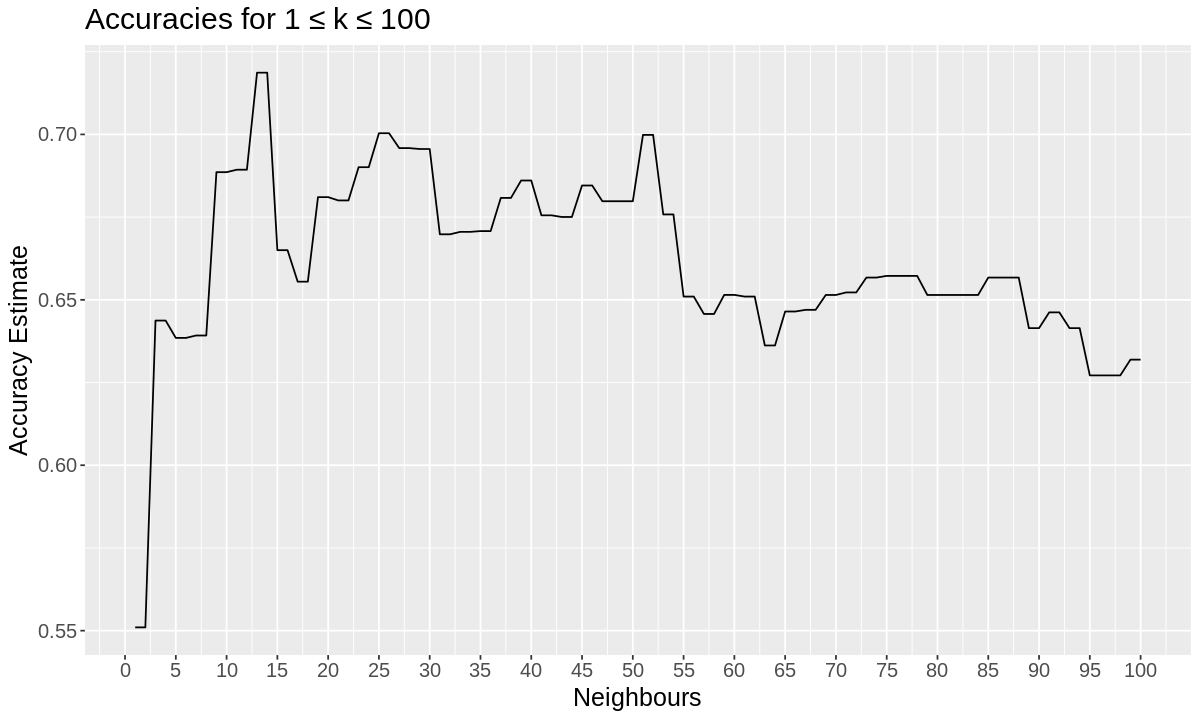

In [17]:
accuracy_plot <- ggplot(knn_results, aes(x = neighbors, y = mean))+
                  geom_line() +
                  labs(x = "Neighbours", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
                  scale_x_continuous(breaks = seq(0, 100, by = 5)) +
                  theme(text = element_text(size = 15))

accuracy_plot

*Figure 10: Accuracy Estimates for K-Nearest Neighbours*

The graph shows how the model's accuracy fluctuates across different k values, peaking at around 13 neighbours, indicating that smaller k values tend to perform better for this dataset before the accuracy begins to decline with larger numbers of neighbours. Therefore, we will use *k = 13*.

## Comparing to a Majority Classifier

It's also essential to measure our model's performance against a majority classifier to ensure it truly enhances predictive capabilities.

In [18]:
# Comparing accuracy of classifier with majority classifier
hungarian_proportions <- training_data |>
                        group_by(num) |>
                        summarize(n = n()) |>
                        mutate(percent = 100 * n / nrow(training_data))

hungarian_proportions

num,n,percent
<fct>,<int>,<dbl>
0,126,62.68657
1,75,37.31343


*Figure 11: Distribution of Heart Disease Presence for Majority Classifier Comparison*

The table shows the distribution of heart disease within the training dataset: 62.69% of patients do not have heart disease (`num = 0`), while 37.31% do (`num = 1`). This distribution sets a baseline accuracy of 62.69% for a majority classifier, which assumes no heart disease for all cases. This baseline is critical for comparing the effectiveness of more sophisticated predictive models.

## Building the Final Model

Using the optimal *k* value of 13, we will now apply it to fit the `training_data`.

In [25]:
set.seed(123)

final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 13) |>
                set_engine("kknn") |>
                set_mode("classification")

fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(final_spec) |>
    fit(data = training_data)

fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3034826
Best kernel: rectangular
Best k: 13

## Evaluating on the Test Set

Now, we will evaluate the classifier's performance on the testing set, which consists of previously unseen data. By applying the model trained with the optimal settings to this dataset, we can assess its accuracy and further analyze its effectiveness through metrics and a confusion matrix.

In [26]:
# predict
predictions <- predict(fit, testing_data) |>
              bind_cols(testing_data)

### Accuracy

In [27]:
# find the accuracy of the predictions
predictions |>
  metrics(truth = num, estimate = .pred_class) |>
  filter(.metric == "accuracy")
cat("Figure 12: Accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6521739


Figure 12: Accuracy

### Precision

In [28]:
# find the precision of the predictions
predictions |>
    precision(truth = num, estimate = .pred_class, event_level="first")
cat("Figure 13: Precision")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6862745


Figure 13: Precision

### Recall

In [29]:
# find the recall of the predictions
predictions |>
    recall(truth = num, estimate = .pred_class, event_level="first")
cat("Figure 14: Recall")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8139535


Figure 14: Recall

### Conufsion Matrix

In [30]:
# confusion matrix
confusion <- predictions |>
             conf_mat(truth = num, estimate = .pred_class)
confusion
cat("\nFigure 15: Confusion Matrix\n")

          Truth
Prediction  0  1
         0 35 16
         1  8 10


Figure 15: Confusion Matrix


The classifier's performance on the testing data reveals several insights about its efficacy in predicting heart disease:

- **Accuracy of 65.2%** indicates a moderate level of correctness in overall predictions, suggesting that the model performs reasonably well in distinguishing between the presence and absence of heart disease, but there is room for improvement (*Figure 12*).

- **Precision of 68.6%** shows that when the model predicts heart disease, it is correct about two-thirds of the time. This is crucial for avoiding over-treatment or unnecessary anxiety for patients incorrectly diagnosed with heart disease (*Figure 13*).

- **Recall of 81.4%** is a strong point of the model, highlighting its capability to identify a high proportion of actual heart disease cases. This high recall is vital in medical settings, as it minimizes the risk of missing a diagnosis of heart disease, ensuring that most patients who truly have heart disease are identified (*Figure 14*).

The confusion matrix provides a more detailed breakdown (*Figure 15*):
- **True Negatives (35):** The model correctly predicted 35 individuals as not having heart disease. This number represents accurate predictions where the disease was absent.

- **False Positives (8):** Here, 8 individuals were incorrectly predicted to have heart disease when they did not. This error can cause unnecessary concern and potentially lead to unwarranted medical interventions.

- **False Negatives (16):** The model failed to identify 16 cases of actual heart disease. This type of error is particularly serious in medical diagnostics as it represents missed opportunities for early intervention, which can be crucial for patient outcomes.

- **True Positives (10):** The model accurately identified 10 individuals who truly had heart disease. This is crucial for effective treatment planning and management.

## Discussion

The analysis conducted using the Hungarian subset of the UCI Heart Disease dataset provides a nuanced answer to the question: "Do age, cholesterol levels, and maximum heart rate effectively forecast the occurrence of heart disease?" The results indicate that while these factors do contribute to predicting heart disease, their effectiveness is moderate.

**Summary of Findings:** 
Our analysis demonstrated that age, cholesterol levels, and maximum heart rate are pivotal predictors of heart disease within the Hungarian subset of the UCI Heart Disease dataset. The classifier's performance, as measured by accuracy, precision, and recall, was satisfactory but did not reach high-performance levels. The model showed a fair capability to distinguish between those with and without heart disease, though there was a noticeable disparity in its ability to accurately predict positive versus negative cases.

**Expectations vs. Reality:** 
The findings somewhat met expectations based on the well-documented associations between these predictors and heart disease risk. However, the accuracy levels were lower than expected, potentially due to the multifaceted nature of heart disease and the limitations inherent in utilizing only three predictors. Compared to a majority classifier, our model demonstrated superior predictive capability, illustrating its advantage over simplistic rule-based predictions.

**Impact of Findings:** 
These results reinforce the relevance of monitoring age, cholesterol, and maximum heart rate in assessing the risk of heart disease, advocating for their ongoing application in medical diagnostics. Effective prediction of heart disease can facilitate prompt medical interventions, possibly mitigating disease severity early on. Furthermore, the incorporation of these predictive models into routine clinical practice could help physicians in effectively triaging patients, ensuring those at higher risk receive timely and appropriate care.

**Future Research Questions:**
1. **Integration of Additional Predictors:** How might the inclusion of other risk factors, such as chest pain type, fasting blood sugar, and resting electrocardiographic results, enhance the model's predictive accuracy?
2. **Longitudinal Analysis:** Could a longitudinal study design, tracking patients over time, provide insights into how changes in the predictors influence the onset and progression of heart disease?
3. **Algorithmic Improvements:** What advanced machine learning techniques could be applied to improve the predictive performance of the models? For example, could ensemble methods or deep learning provide better accuracy and recall?

The study highlights the complexity of heart disease prediction, underscoring the need for a more comprehensive model that integrates additional biological, lifestyle, and genetic factors. Therefore, while the answer is affirmative, it comes with the caveat that for more precise and actionable predictions, a broader spectrum of risk factors should be considered in the predictive models.

## References

Di Cesare M, Perel P, Taylor S, Kabudula C, Bixby H, Gaziano TA, McGhie DV, Mwangi J, Pervan B, Narula J, Pineiro D, Pinto FJ. The Heart of the World. Glob Heart. 2024 Jan 25;19(1):11. doi: 10.5334/gh.1288. PMID: 38273998; PMCID: PMC10809869.

Harvard Health. (2023, June 13). What is a normal heart rate? https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you#:~:text=It%20speeds%20up%20and%20slows,disease%20or%20other%20medical%20condition.

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Rodgers JL, Jones J, Bolleddu SI, Vanthenapalli S, Rodgers LE, Shah K, Karia K, Panguluri SK. Cardiovascular Risks Associated with Gender and Aging. J Cardiovasc Dev Dis. 2019 Apr 27;6(2):19. doi: 10.3390/jcdd6020019. PMID: 31035613; PMCID: PMC6616540.